**Kernel SVM**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [35]:
df = pd.read_csv('Customers.csv')
print(df.head())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [37]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Feature scaling applied.')

Feature scaling applied.


In [38]:
# Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [39]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


This means the model predicts that the hypothetical customer with an age of 30 and an estimated salary of $60,000 will not buy the insurance product.

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


In [42]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9


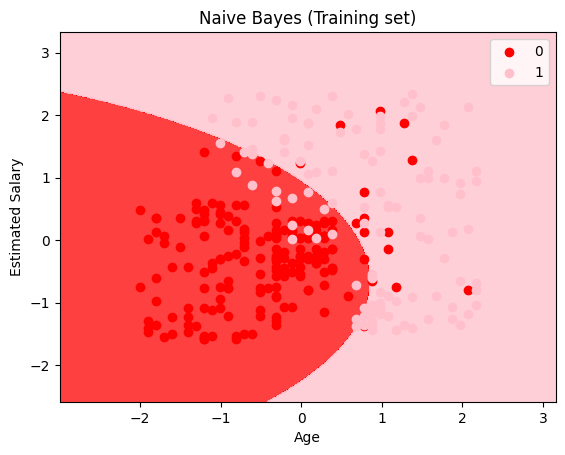

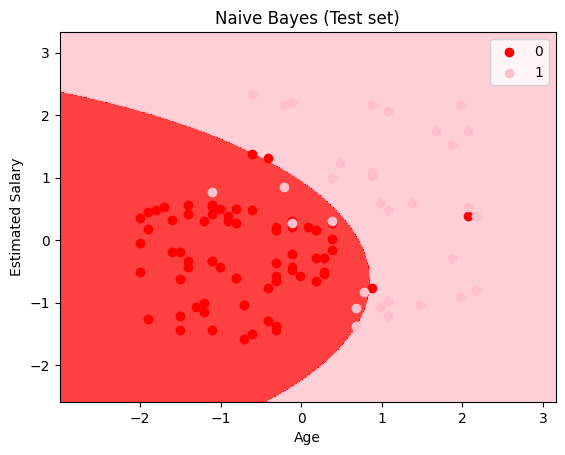

In [43]:
def visualize_results(X_set, y_set, set_type):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.figure(facecolor='white')
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'pink')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ['red', 'pink'][i], label = j)
    plt.title('Naive Bayes ({} set)'.format(set_type))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualizing the Training set results
visualize_results(X_train, y_train, 'Training')
# Visualizing the Test set results
visualize_results(X_test, y_test, 'Test')

In these plots, the red points represent customers who did not purchase the product, and the pink points represent customers who did. The background color indicates the model's prediction for a given area, with red indicating a prediction of "will not purchase" and pink indicating "will purchase."